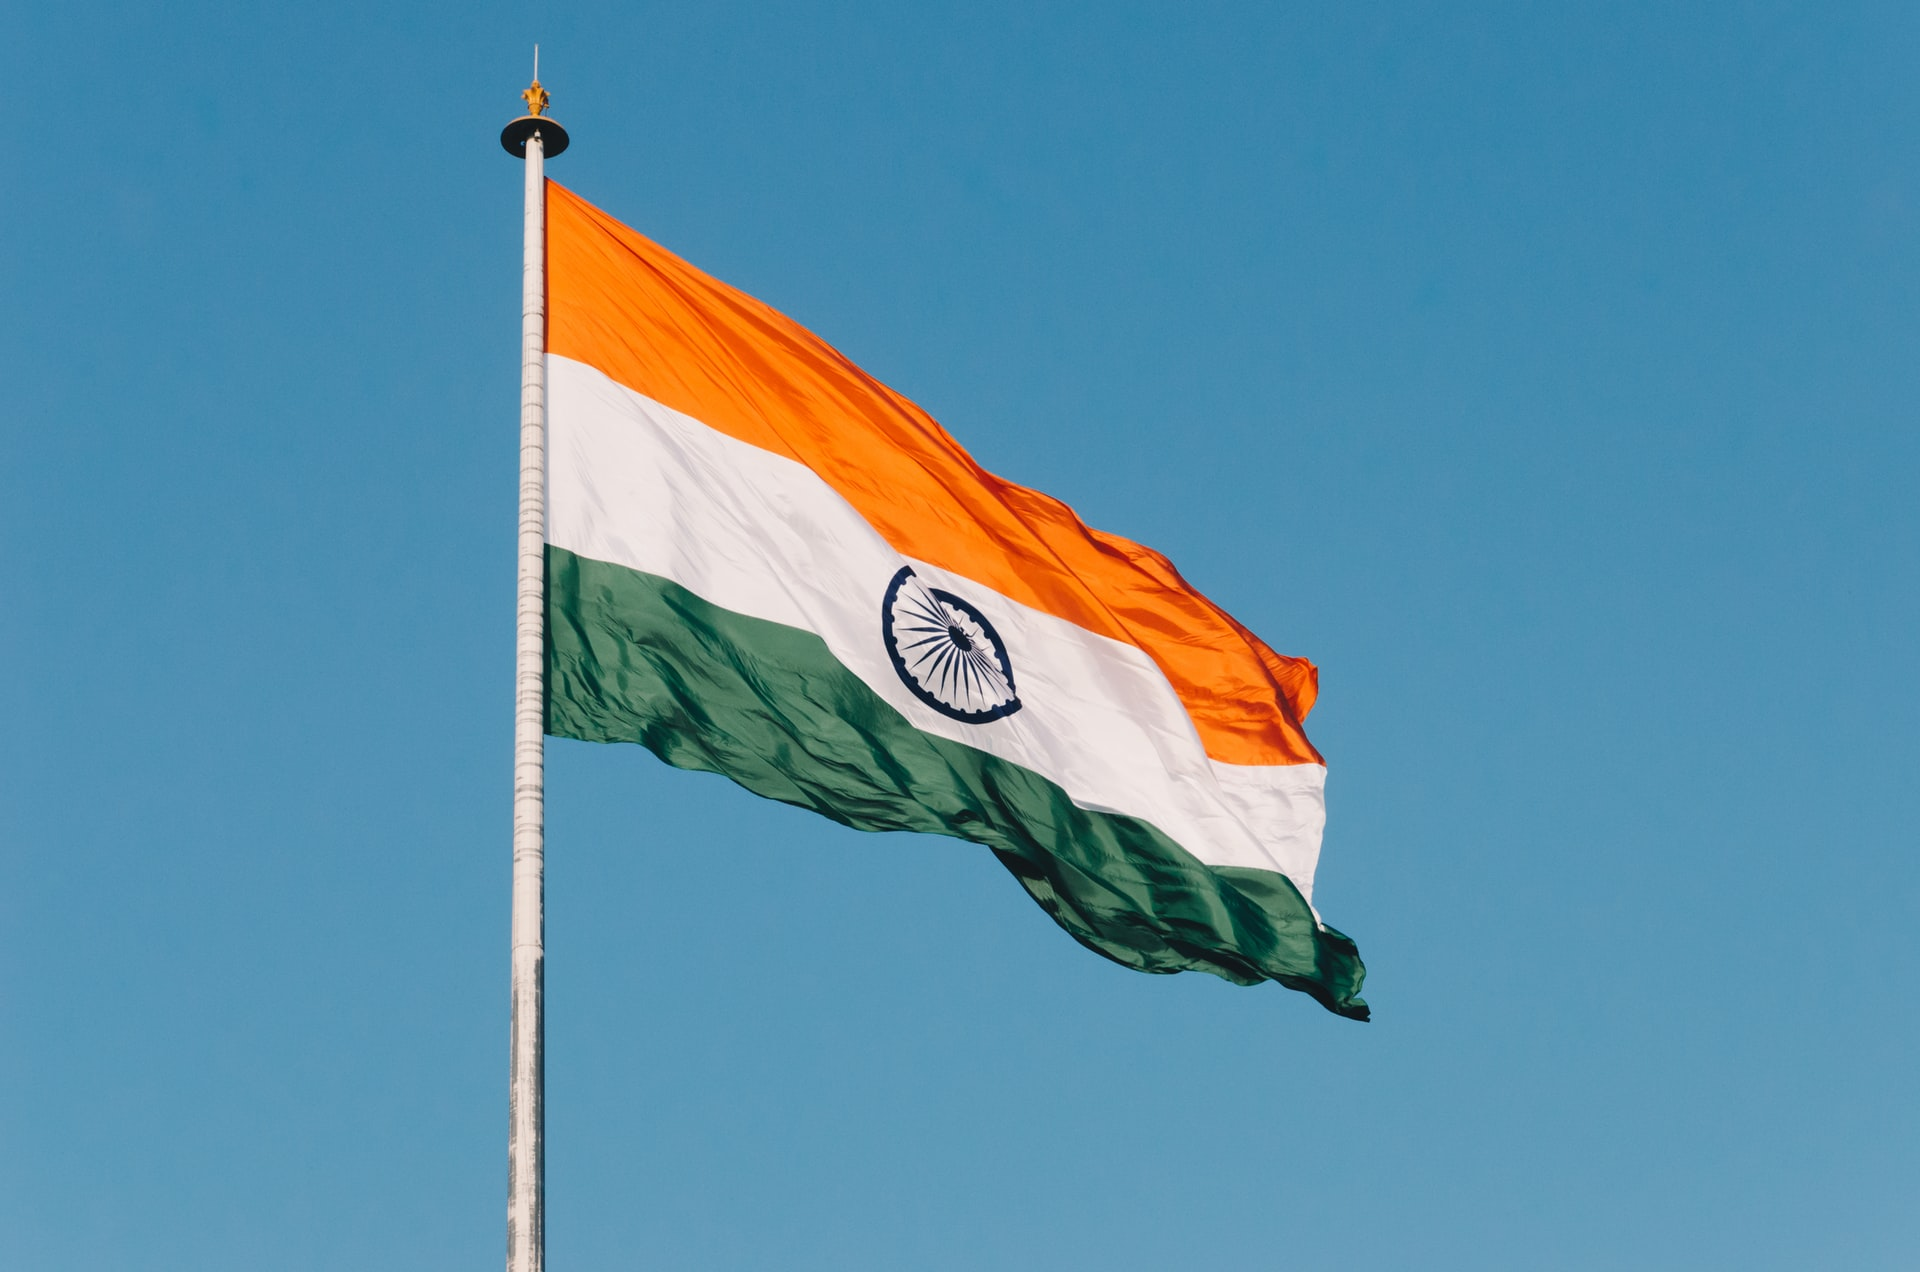

# Introduction

India has parliamentary system of governance.This system consists of two houses , first Rajya Sabha (Council of states) and second Lok Sabha(House of the people). The given dataset contains information about the **Loksabha Election Results from 1951 to 2019**. The members of Lok Sabha are directly elected by the population of the country.Unlike USA India has multy-Party system. The party which wins maximum required seats to form a government (half of the total seats) then forms a government either independently or via coalition with other party. 

In [ ]:
#importing some libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
import matplotlib
import plotly.graph_objects as go
from IPython.core.display import HTML

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Lets look at the data

In [ ]:
df = pd.read_csv("../input/national-parties-data-india-19512019/IndianElection.csv" )
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  #deleting unnamed columns. I have created this dataset , dont know why there are so many unnamed columns.
df.head(5)


In [ ]:
df.Year.unique()

We have data about contestents , winning seats and Deposit Fortified candidates from 1951 to 2019.

**Deposit Fortified** : If a candidate fails to get 1/6 of the total valid votes franchised in that constituency then the amount deposited by the candidate is seized by the Election Commission of India. As per Section 34, 1 (a) of the Representation of the People Act,1951

In [ ]:
dfc = df.copy()
dfc = dfc.loc[:,~dfc.columns.str.startswith('Total')]
dfc = dfc.loc[:,~dfc.columns.str.endswith('votes')]
dfc = dfc.loc[:,~dfc.columns.str.endswith('c')]
dfc = dfc.loc[:,~dfc.columns.str.endswith('C')]
dfc = dfc.loc[:,~dfc.columns.str.endswith('DF')]
dfc = dfc.fillna(0)
dfc = dfc.astype(int)
dfc = dfc.T.reset_index()

dfc = dfc.rename(columns=dfc.iloc[0]).drop(dfc.index[0])
dfc['Year'] = dfc['Year'].str.replace('_w', '')
dfc.to_csv('win.csv',index=False)


**Bar Chart Race**

In [ ]:

HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2681432" data-url="https://flo.uri.sh/visualisation/2681432/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [ ]:
dfmelt = pd.melt(df, id_vars=['Year'], value_vars= df.loc[:, df.columns != 'Year'],
        var_name='Party', value_name='Seats')

dfmelt = dfmelt[dfmelt['Party'].str.contains("_w")]
dfmelt = dfmelt[~dfmelt.Party.str.contains("_wN")]
dfmelt.Party = dfmelt.Party.str.replace('_w', '')

dfmelt = dfmelt.pivot(index='Party', columns='Year', values='Seats')
dfmelt = dfmelt.fillna(0)
dfmelt = dfmelt.astype(int)
dfmelt.to_csv('parl.csv',index= True)


# Election Results over the years

In [ ]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-parliament" data-src="visualisation/2445706" data-url="https://flo.uri.sh/visualisation/2445706/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

Voting Percentage over the Years & Voting percentage for Natioanl Parties

In [ ]:
df['vote_percent'] = (df['Total_Valid_votes'] / df['Total_electors'])*100
df['nvote_percent']= (df['Total_votesN'] / df['Total_electors'])*100
dfvoting = df[['Year', 'vote_percent', 'nvote_percent']]

In [ ]:
dfvoting = pd.melt(dfvoting, id_vars=['Year'], value_vars= ['vote_percent','nvote_percent'],
        var_name='total', value_name='percent')

In [ ]:
sns.set_context("poster")
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
ax = sns.barplot(x = 'Year', y = 'percent',hue = 'total', data = dfvoting)

plt.xticks(rotation= 45)
plt.title('Percentage of total voting and voting percentage to Natioanl Party',size = 25)
ax.get_legend().set_bbox_to_anchor((1, 1)) #position of legend